# Programming for Data Analysis - Project 2
## An Analysis of Paleo to Present Climate Data

Author: Daniel Mc Donagh

Student ID: G00410864

## Introduction

Debate about earth climate change has been ongoing for decades. Scientific studies done by paleoclimatologists, where evidence gathered from sources such as ice cores taken in the antartic have been used to find evidence of past atmospheric conditions and determine temperatures of the climate at that time have greatly expanded our understanding of past climatic events. Hoever it has also showed trends in recent decades that are worrying at best. Our current rate of increase of carbon dioxide in the atmosphere since the industrial age has far surpassed anything seen on this planet in the last 800,000 years. This research will look to stitch together data taken from studies .

## Data Gathering


### Carbon Dioxide
The temperature and CO2 data were provided by Lecturer Brian McGinley in excel file format "Composite of atmospheric CO2 records from Antarctic ice cores". This was added into data folder as carbon_dioxide.xls . It is a composite of multiple data sets covering a range going back 800,000 years. (Bereiter et al., 2014)



**EDC3 Age Scale**

The year denoted by the EDC3 age scale is a representation of the age of the sample relative to the year 1950. This year is taken as present and any year prior to that year is BP or before present. Example 5 BP is 1945. Any year coming after 1950 will have a negative value. Example -50 would be the year 2000.



In [37]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# read in composite CO2 data from excel - xls converted to xlsx to work with latest interpreter before being read into dataframe.
df1 = pd.read_excel('data/carbon_dioxide.xlsx', sheet_name=2, header=6,)

# Display the data
print(df1)

      EDC3_gas_a (yr)  CO2 (ppmv)
0                 137       280.4
1                 268       274.9
2                 279       277.9
3                 395       279.1
4                 404       281.9
...               ...         ...
1091           794608       199.4
1092           795202       195.2
1093           796467       189.3
1094           797099       188.4
1095           798512       191.0

[1096 rows x 2 columns]


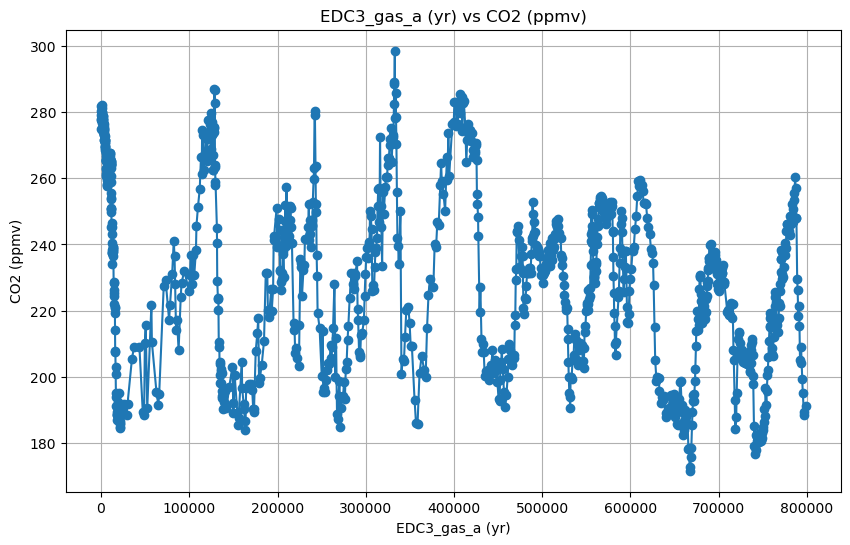

In [11]:
# Plotting EDC3_gas_a (yr) vs CO2 (ppmv)
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df1['EDC3_gas_a (yr)'], df1['CO2 (ppmv)'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 (ppmv)')
plt.title('EDC3_gas_a (yr) vs CO2 (ppmv)')

# Display the plot
plt.grid(True)
plt.show()

Addition of Mono Loa data to bring CO2 records up to present

In [12]:
# read in composite CO2 data from excel
df2 = pd.read_csv('data/co2_annmean_mlo.csv', header=43)

# Convert values of year to EDC3 format
df2['year'] = (df2['year'] - 1950) * -1

# Drop UNC column
del df2['unc']

# Display the data
print(df2)

    year    mean
0     -9  315.98
1    -10  316.91
2    -11  317.64
3    -12  318.45
4    -13  318.99
..   ...     ...
59   -68  408.72
60   -69  411.65
61   -70  414.21
62   -71  416.41
63   -72  418.53

[64 rows x 2 columns]


In [13]:
# Changing column names to match both dataframes
df2.columns = ['EDC3_gas_a (yr)', 'CO2 (ppmv)']

# Merge the two dataframes
merged_df = pd.concat([df2, df1], ignore_index=True)

# Display the data
print(merged_df)

      EDC3_gas_a (yr)  CO2 (ppmv)
0                  -9      315.98
1                 -10      316.91
2                 -11      317.64
3                 -12      318.45
4                 -13      318.99
...               ...         ...
1155           794608      199.40
1156           795202      195.20
1157           796467      189.30
1158           797099      188.40
1159           798512      191.00

[1160 rows x 2 columns]


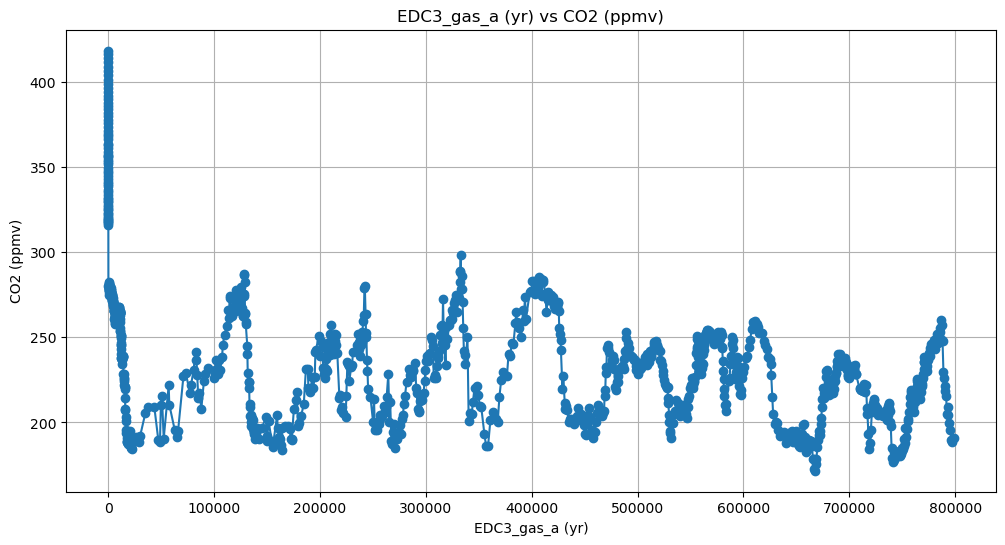

In [14]:
# Plotting EDC3_gas_a (yr) vs CO2 (ppmv)
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(merged_df['EDC3_gas_a (yr)'], merged_df['CO2 (ppmv)'], marker='o', linestyle='-')



# Adding labels and title
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO2 (ppmv)')
plt.title('EDC3_gas_a (yr) vs CO2 (ppmv)')

# Display the plot
plt.grid(True)
plt.show()

### Temperature 
The temperature dataset used was provided by Lecturer Brian McGinley in txt file format "EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt" The temperature variable is a measure of deviation from the long term average taken from the last 1000 years. (Jouzel et al., 2007) 

The image below shows the location of the Dome C research facility where the ice core sampling was done to produce the dataset being used.

![Geographical map of Antartica, showing Dome C](https://www.researchgate.net/profile/Margarita-Kallistratova/publication/304375321/figure/download/fig13/AS:391246511132682@1470291845422/Geographical-map-of-Antarctica-with-the-position-of-Dome-C-where-the-French-Italian.png)

In [30]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# read in temperature from original source "EPICA Dome C..." txt file" 
dfTemperature = pd.read_csv('data/EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimate 2007.txt', sep='\s+', skiprows=91)
dfTemperature.head()

# check for Null entries
print(dfTemperature.isnull().sum()) 
dfTemperature.describe()

# Display dataframe
print(dfTemperature)


Bag             0
ztop            0
Age             0
Deuterium      12
Temperature    15
dtype: int64
       Bag     ztop           Age  Deuterium  Temperature
0        1     0.00     -50.00000        NaN          NaN
1        2     0.55     -43.54769        NaN          NaN
2        3     1.10     -37.41829        NaN          NaN
3        4     1.65     -31.61153        NaN          NaN
4        5     2.20     -24.51395        NaN          NaN
...    ...      ...           ...        ...          ...
5795  5796  3187.25  797408.00000    -440.20        -8.73
5796  5797  3187.80  798443.00000    -439.00        -8.54
5797  5798  3188.35  799501.00000    -441.10        -8.88
5798  5799  3188.90  800589.00000    -441.42        -8.92
5799  5800  3189.45  801662.00000    -440.90        -8.82

[5800 rows x 5 columns]


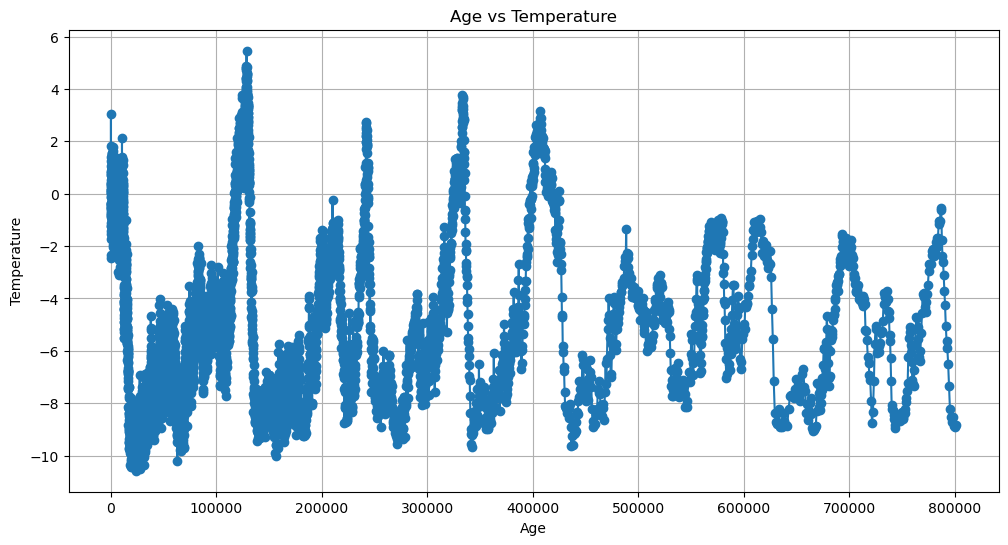

In [17]:
# Age vs Temperature plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot((dfTemperature)['Age'], dfTemperature['Temperature'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Temperature')
plt.title('Age vs Temperature')

# Display the plot
plt.grid(True)
plt.show()

In [18]:
# Combining Temperature plot and CO2 plot together

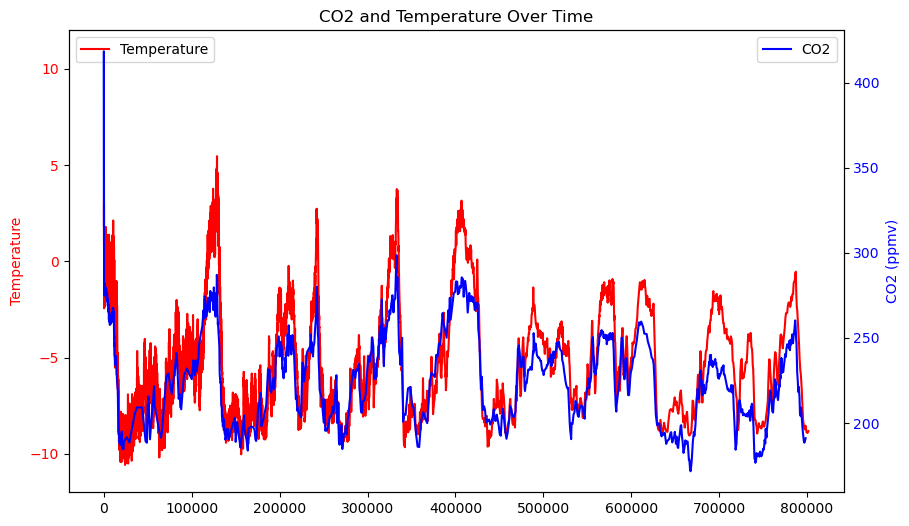

In [19]:
# Create a new figure with shared x-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Temperature data on the left y-axis
ax1.plot(dfTemperature['Age'], dfTemperature['Temperature'], label='Temperature', color='red')
ax1.set_ylabel('Temperature', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Set y-axis limits for the temperature axis
ax1.set_ylim(-12, 12)

# Create a second y-axis for CO2 data
ax2 = ax1.twinx()
ax2.plot(merged_df['EDC3_gas_a (yr)'], merged_df['CO2 (ppmv)'], label='CO2', color='blue')
ax2.set_xlabel('EDC3_gas_a (yr)')
ax2.set_ylabel('CO2 (ppmv)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('CO2 and Temperature Over Time')
plt.show()

### CH4 addition of data

In [21]:
# read in composite CO2 data from excel
Methane_df = pd.read_csv('data/ch4_annmean_gl.csv', header=43)

# Convert values of year to EDC3 format
#df2['year'] = (df2['year'] - 1950) * -1

# Drop UNC column
#el df2['unc']

# Display the data
print(Methane_df)

    year     mean   unc
0   1984  1644.85  0.67
1   1985  1657.29  0.59
2   1986  1670.09  0.74
3   1987  1682.70  0.49
4   1988  1693.28  0.67
5   1989  1704.53  0.55
6   1990  1714.43  0.68
7   1991  1724.78  0.72
8   1992  1735.47  0.57
9   1993  1736.53  0.46
10  1994  1742.07  0.58
11  1995  1748.88  0.48
12  1996  1751.28  0.68
13  1997  1754.48  0.42
14  1998  1765.54  0.64
15  1999  1772.33  0.64
16  2000  1773.22  0.81
17  2001  1771.22  0.59
18  2002  1772.66  0.55
19  2003  1777.33  0.50
20  2004  1777.05  0.50
21  2005  1774.16  0.64
22  2006  1774.94  0.56
23  2007  1781.38  0.63
24  2008  1787.01  0.77
25  2009  1793.52  0.69
26  2010  1798.91  0.73
27  2011  1803.14  0.63
28  2012  1808.12  0.63
29  2013  1813.43  0.66
30  2014  1822.53  0.53
31  2015  1834.26  0.55
32  2016  1843.12  0.68
33  2017  1849.58  0.64
34  2018  1857.33  0.82
35  2019  1866.58  0.60
36  2020  1878.93  0.56
37  2021  1895.28  0.55
38  2022  1911.83  0.78


In [26]:
# read in temperature from original source "EPICA Dome C..." txt file" 
Methane_df1 = pd.read_csv('data/EDC_CH4.txt', sep='\t+', skiprows=19)
Methane_df1.head()

# check for Null entries
print(Methane_df1.isnull().sum()) 
Methane_df1.describe()

# Display dataframe
print(Methane_df1)

C:\Users\damcdonagh\AppData\Local\Temp\ipykernel_10112\4023486912.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Methane_df1 = pd.read_csv('data/EDC_CH4.txt', sep='\t+', skiprows=19)


*/    514
dtype: int64
                                                                                                                                                                                 */
Depth ice/snow [m] Depth ref [m] (For EDC96 depth levels the co...) Gas age [ka BP] (based on EDC1 timescale) Gas age [ka BP] (based on EDC2 timescale) CH4 [ppbv]  CH4 std dev [±]
99.340             99.530                                           0.062                                     0.000                                     907.0                    10
102.575            102.765                                          0.170                                     0.148                                     761.7                    10
104.775            104.965                                          0.245                                     0.212                                     682.7                    10
106.625            106.815                                          0.309    

## Irish Context
A comprehensive study covering a 305 year period from 1711 to 2016 has been analysed below. It was taken from a 

![Torrential Rain in Ireland](data/rain.jpeg)

In [28]:
# Load Irish rainfall data.
df_rain = pd.read_csv('data/composite_rainfall.CSV')

# show dataframe
df_rain

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


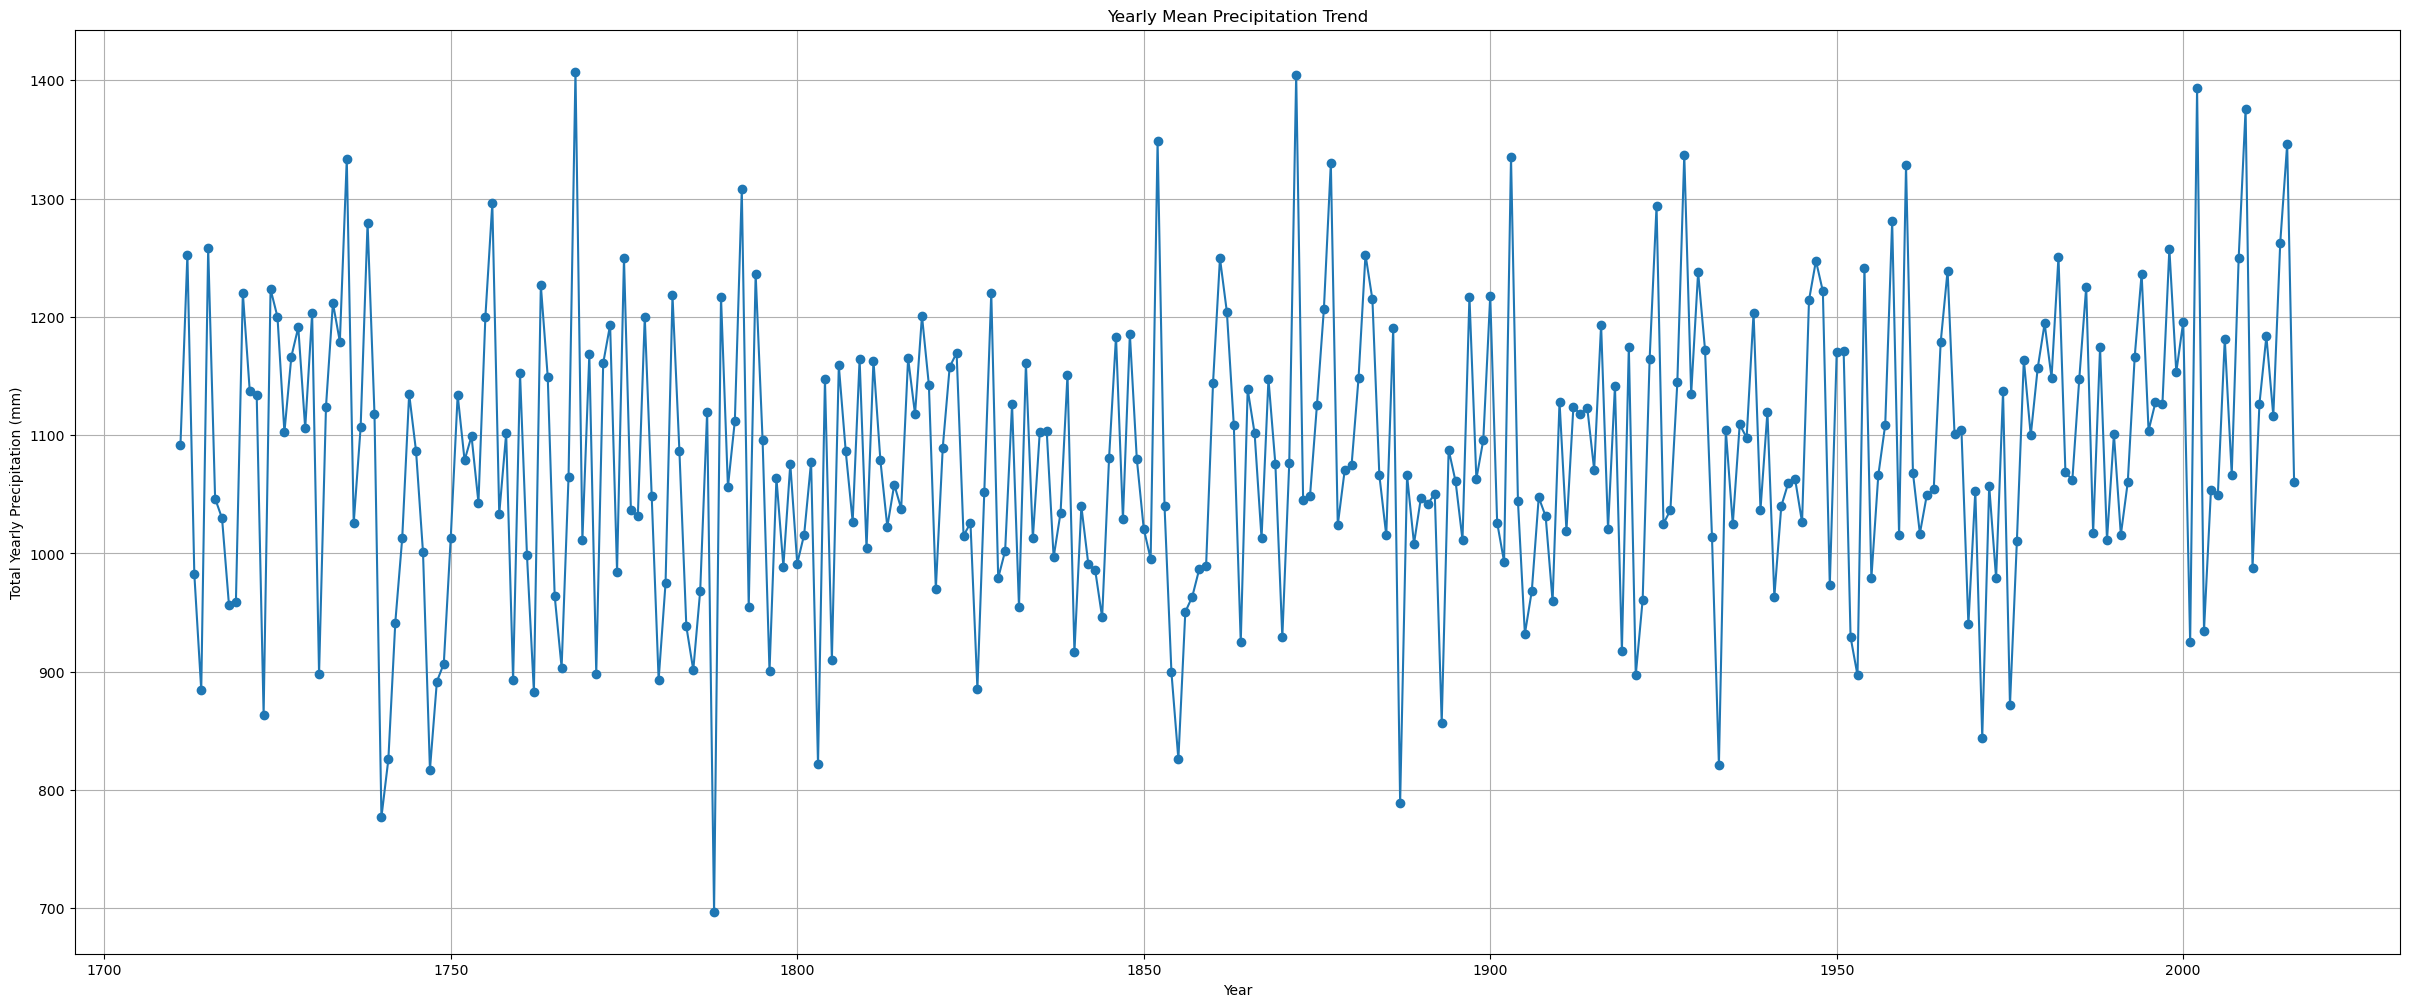

In [35]:
# Grouping data by Year to calculate yearly mean
yearly_totals = df_rain.groupby('Year')['Median montly series'].sum().reset_index()

# Create line plot
plt.figure(figsize=(30, 12))
plt.plot(yearly_totals['Year'], yearly_totals['Median montly series'], marker='o', linestyle='-')
plt.title('Yearly Mean Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Total Yearly Precipitation (mm)')
plt.grid(True)

# Show the plot
plt.show()

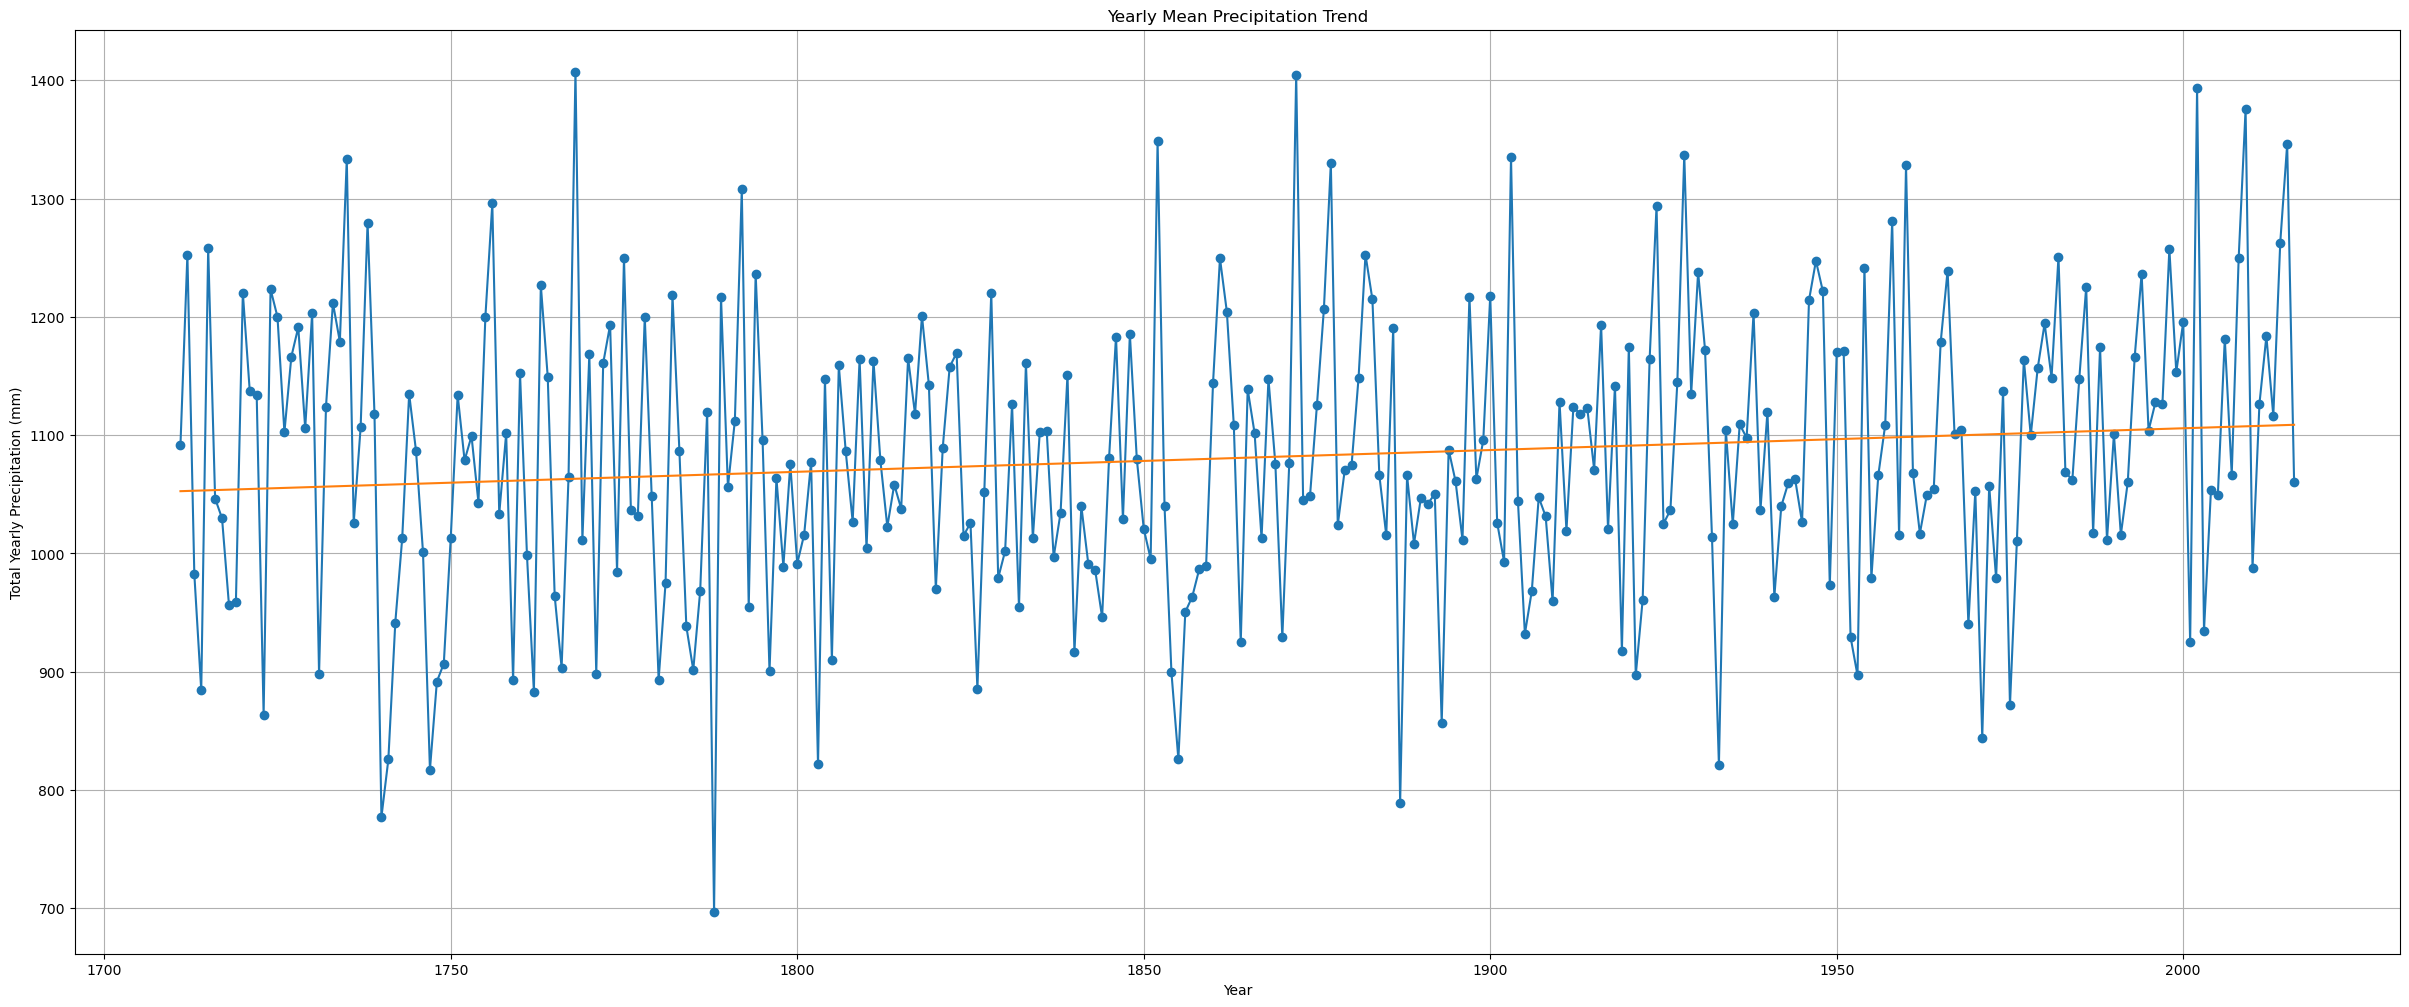

In [41]:
import numpy
from matplotlib import pyplot as plt

# Grouping data by Year to calculate yearly mean
yearly_totals = df_rain.groupby('Year')['Median montly series'].sum().reset_index()


# Plot the Data itself.
plt.figure(figsize=(30, 12))
plt.plot(yearly_totals['Year'], yearly_totals['Median montly series'], marker='o', linestyle='-')
plt.title('Yearly Mean Precipitation Trend')
plt.xlabel('Year')
plt.ylabel('Total Yearly Precipitation (mm)')
plt.grid(True)

# Calculate the Trendline
z = numpy.polyfit(yearly_totals['Year'], yearly_totals['Median montly series'], 1)
p = numpy.poly1d(z)

# Display the Trendline
plt.plot(yearly_totals['Year'], p(yearly_totals['Year']))

<function matplotlib.pyplot.show(close=None, block=None)>

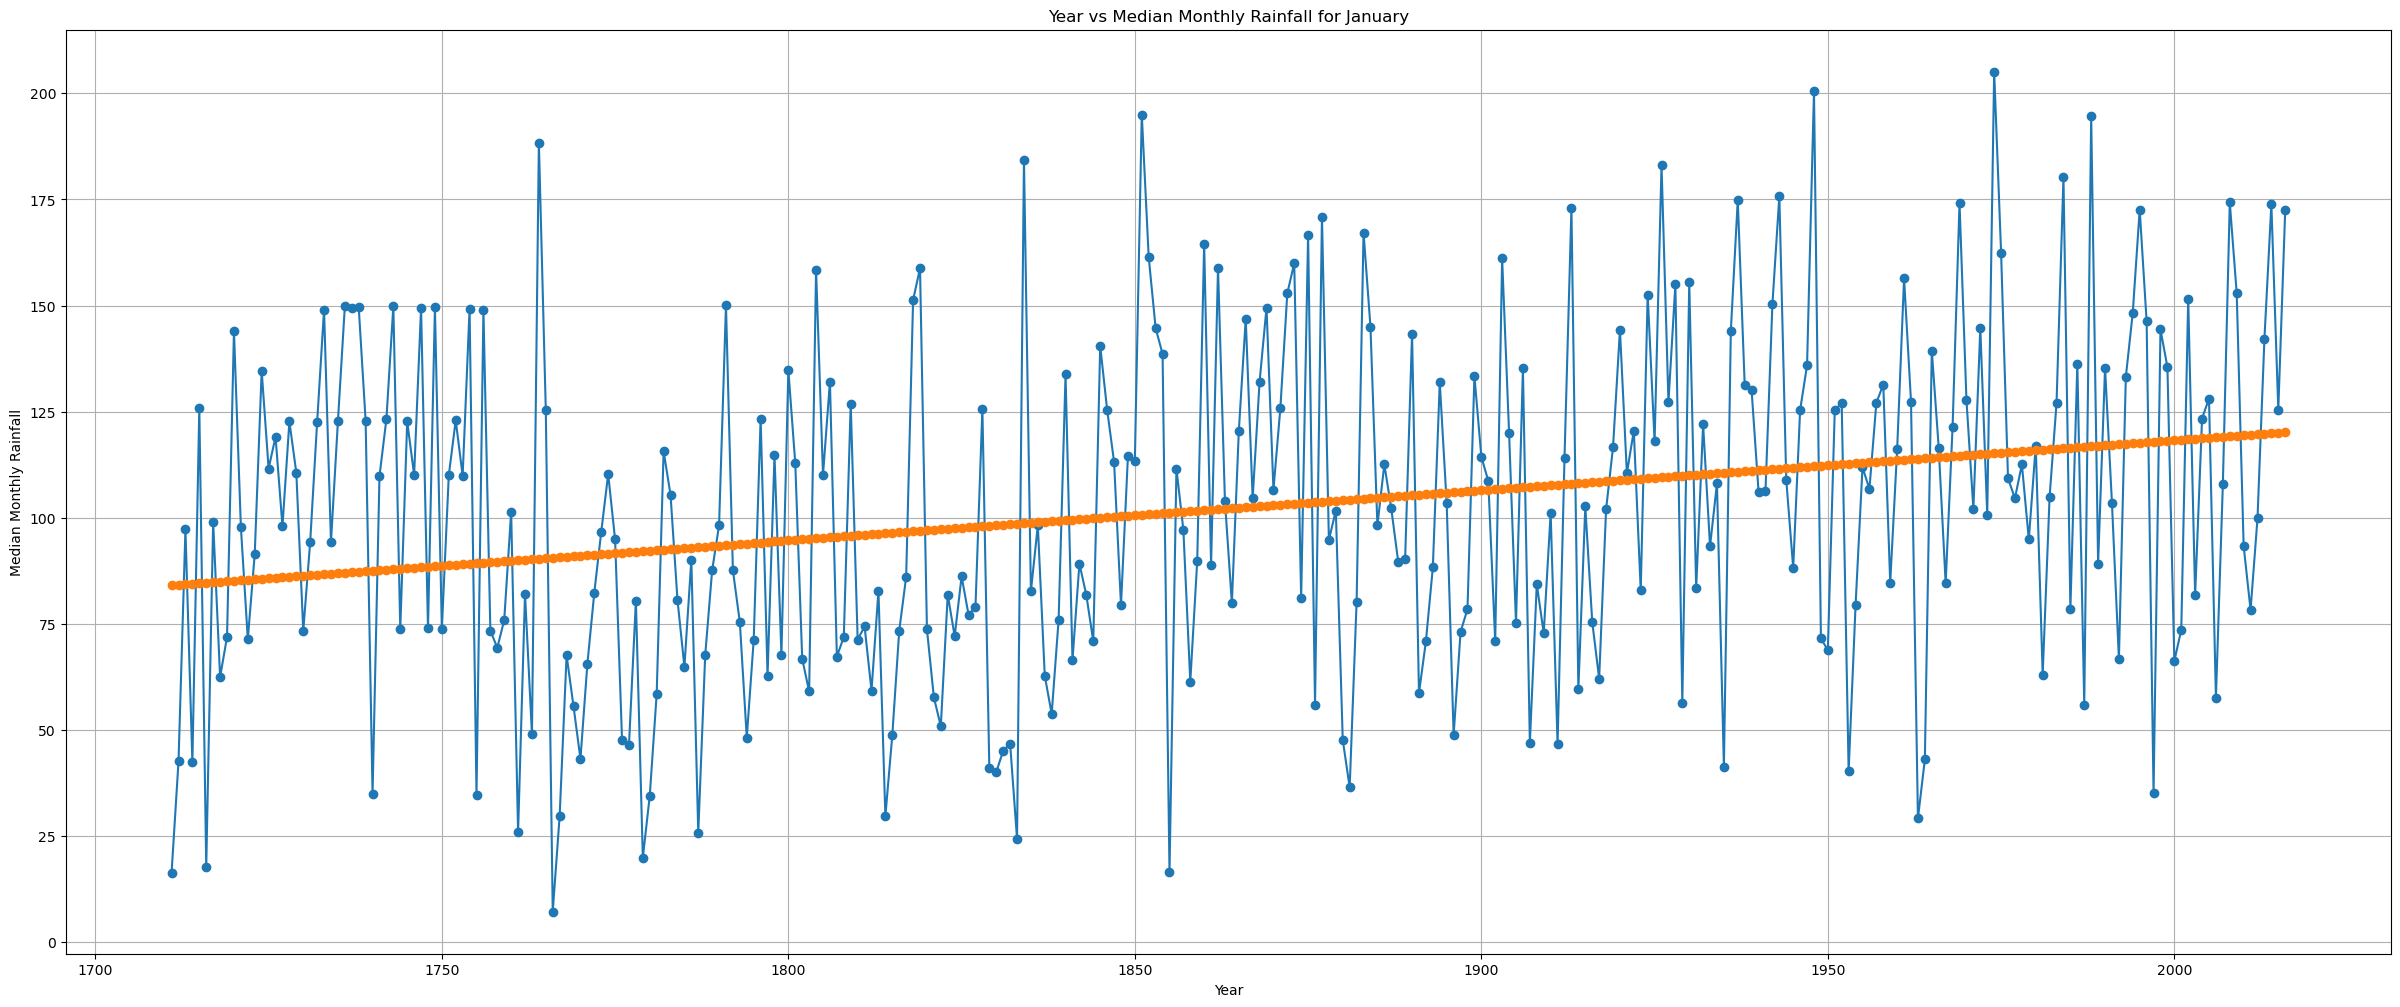

In [48]:
import numpy
from matplotlib import pyplot as plt

# Filter rows where 'month' is equal to 1
filtered_df = df_rain[df_rain['Month'] == 1]

# Plot the Data itself.
plt.figure(figsize=(30, 12))
plt.plot(filtered_df['Year'], filtered_df['Median montly series'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Median Monthly Rainfall')
plt.title('Year vs Median Monthly Rainfall for January')
plt.grid(True)

# Calculate the Trendline
z = numpy.polyfit(filtered_df['Year'], filtered_df['Median montly series'], 1)
p = numpy.poly1d(z)

# Display the Trendline
plt.plot(filtered_df['Year'], p(filtered_df['Year']), marker='o', linestyle='-')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

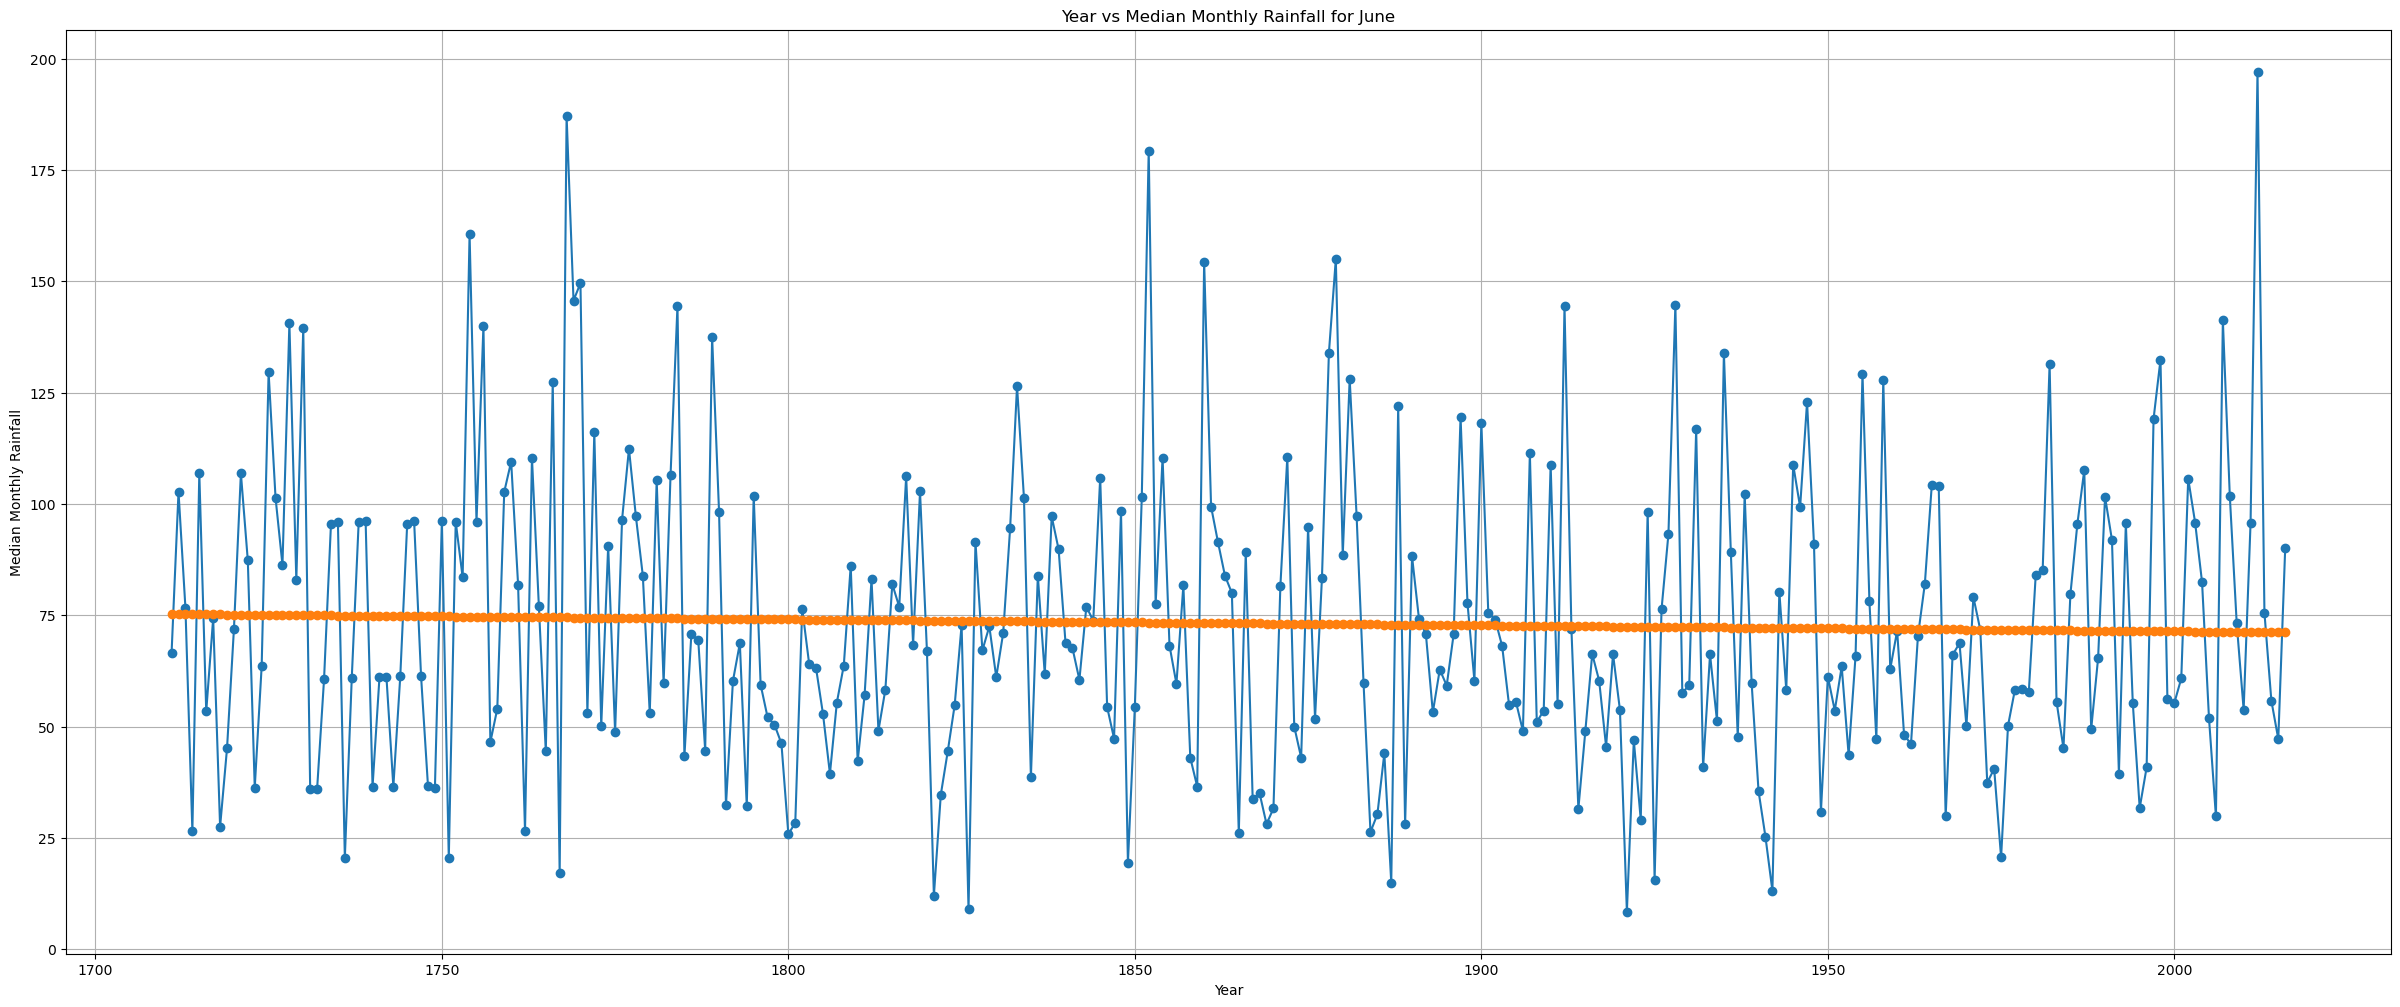

In [49]:
import numpy
from matplotlib import pyplot as plt

# Filter rows where 'month' is equal to 1
filtered_df = df_rain[df_rain['Month'] == 6]

# Plot the Data itself.
plt.figure(figsize=(30, 12))
plt.plot(filtered_df['Year'], filtered_df['Median montly series'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Median Monthly Rainfall')
plt.title('Year vs Median Monthly Rainfall for June')
plt.grid(True)

# Calculate the Trendline
z = numpy.polyfit(filtered_df['Year'], filtered_df['Median montly series'], 1)
p = numpy.poly1d(z)

# Display the Trendline
plt.plot(filtered_df['Year'], p(filtered_df['Year']), marker='o', linestyle='-')

plt.show

## References

### Markdown

Stack overflow, 2023
https://stackoverflow.com/questions/15155778/superscript-in-markdown-github-flavored/15156585#15156585


Studylib, 2024
https://studylib.es/doc/8825178/cheatsheet-markdown

### Python

(Pandas, 2014)
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

### Data Sources

(Bereiter et al., 2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

(Jouzel et al., 2007) Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years., Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

Conor Murphy, Amy Coen, Ian Clancy, Victoria Decristoforo, Steven Cathal, Kevin Healion, Csaba Horvath, Christopher Jessop, Shane Kennedy, Rosalynd Lavery, Kevin Leonard, Ciara McLoughlin, Rory Moore, Daire O'Hare-Doherty, Ricky Paisley, Bipendra Prakash, Julie Vatu, Peter Thorne, Carla Mateus, Ciara Ryan, Simon Noone,
The emergence of a climate change signal in long-term Irish meteorological observations,
Weather and Climate Extremes,
Volume 42,
2023,
100608,
ISSN 2212-0947,
https://doi.org/10.1016/j.wace.2023.100608.
(https://www.sciencedirect.com/science/article/pii/S2212094723000610)